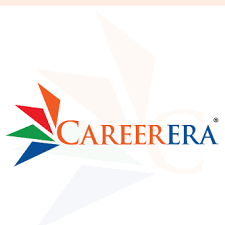

# <span style="color:blue"> ASSIGNMENT QUESTIONS (KNN and SVM)</span>

#### Question 1: Implement a KNN model to classify the animals into categorie
Link to download data: https://drive.google.com/file/d/13erj2fx9o9N4_nWP4GNzzC-6dESNUHwk/view?usp=sharing

In [1]:
#write your code here.. Implement a KNN model to classify the animals and predict they are of which animal type. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate..........

In [2]:
# Load the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Retrieve the record
Animal_df=pd.read_csv('zoo.csv')
Animal_df.sample(20)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
45,lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
65,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
36,hare,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [4]:
# Separating feature data and Label data
X = Animal_df.drop(['animal name','type'],axis=1)
y = Animal_df['type']

In [5]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [6]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [7]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [8]:
# Instantiate the model with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=2) # create instance of K-neighbor classifier
clf=knn.fit(X_train,y_train) #  Training the model 
clf

KNeighborsClassifier(n_neighbors=2)

In [9]:
y_pred=knn.predict(X_test) # predicting using the model
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 3],
      dtype=int64)

In [10]:
knn.score(X_train,y_train)*100

98.75

In [11]:
knn.score(X_test,y_test)*100

100.0

In [12]:
print(confusion_matrix(y_test, y_pred)) # confusion matrix

print(classification_report(y_test, y_pred)) # Clarificication report

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



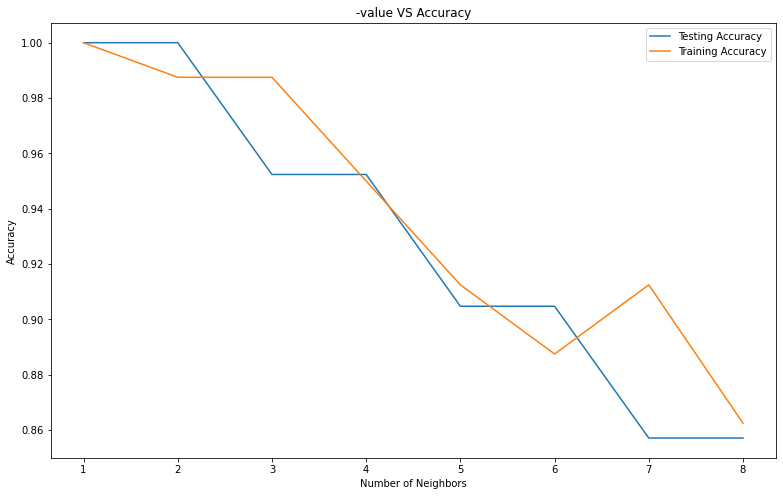

Best accuracy is 1.0 with K = 1


In [13]:
k_values = np.arange(1,9)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 9(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### Question 2: Prepare a model for glass classification using KNN

Link to download data: https://drive.google.com/file/d/1D3ayANBa4X8yc3RKLipSiFxJJR3i9ofy/view?usp=sharing

In [14]:
#write your code here............

In [15]:
# Retrieve the record
glass_df=pd.read_csv('glass.csv')
glass_df.sample(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
44,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
13,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00,2
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
113,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
176,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7


In [16]:
# Separating feature data and Label data
X = glass_df.drop(['Type'],axis=1)
y = glass_df['Type']

In [17]:
#  train-test splitSplit data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((149, 9), (65, 9), (149,), (65,))

In [18]:
# Instantiate the model with 2 neighbors.
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan') # create instance of K-neighbor classifier
model=knn.fit(X_train,y_train) #  Training the model 
model

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [19]:
y_pred=knn.predict(X_test) # predicting using the model
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 6, 5, 6, 1, 3, 6, 1, 7,
       7, 7, 1, 1, 1, 1, 5, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 2, 1, 7, 3, 2,
       3, 5, 6, 3, 6, 1, 1, 1, 1, 2, 1, 1, 1, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [20]:
accuracy_score(y_test,y_pred)*100

67.6923076923077

In [21]:
print(confusion_matrix(y_test, y_pred)) # confusion matrix

print(classification_report(y_test, y_pred)) # Clarificication report

[[16  1  2  0  0  0]
 [ 7 12  1  1  2  0]
 [ 2  0  2  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  1  0  0  2  0]
 [ 1  0  0  0  1  8]]
              precision    recall  f1-score   support

           1       0.62      0.84      0.71        19
           2       0.75      0.52      0.62        23
           3       0.40      0.50      0.44         4
           5       0.80      0.67      0.73         6
           6       0.40      0.67      0.50         3
           7       1.00      0.80      0.89        10

    accuracy                           0.68        65
   macro avg       0.66      0.67      0.65        65
weighted avg       0.72      0.68      0.68        65



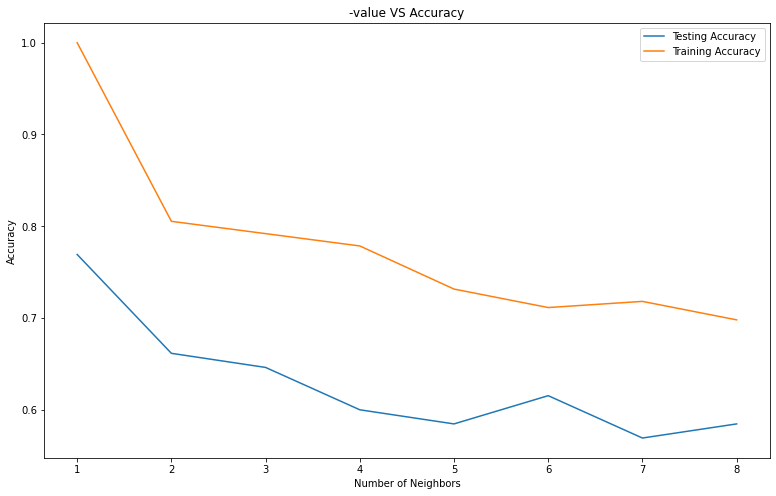

Best accuracy is 0.7692307692307693 with K = 1


In [22]:
k_values = np.arange(1,9)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 9(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

#### Question 3: Prepare a classification model using SVM for salary data

Link to download data: 
Training data: https://drive.google.com/file/d/1vbMwwWfiKBf30fjSqXA3BRhUYaKeIsjw/view?usp=sharing
Test Data: https://drive.google.com/file/d/1VfnK7JT_FfRTuO0rCzBwl9Au9zItde37/view?usp=sharing

In [23]:
#write your code here............# Retrieve the record
from sklearn.svm import SVC
# Load the test data
Salary_df_test=pd.read_csv('SalaryData_Test.csv')
Salary_df_test.sample(25)


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
813,45,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
11125,39,Private,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
1558,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
5027,64,Self-emp-not-inc,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,70,United-States,<=50K
4593,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Wife,White,Female,7298,0,40,United-States,>50K
1106,20,Private,Some-college,10,Never-married,Sales,Own-child,White,Female,594,0,24,United-States,<=50K
12119,63,State-gov,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,27,United-States,<=50K
1324,40,Private,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
14294,60,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,52,United-States,>50K
14433,48,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,65,United-States,>50K


In [24]:
# Load the training data
Salary_df_train=pd.read_csv('SalaryData_Train.csv')
Salary_df_train.sample(25)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
21590,21,Private,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
2681,40,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
14924,24,Federal-gov,Bachelors,13,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,40,United-States,<=50K
14062,25,Private,11th,7,Never-married,Other-service,Not-in-family,White,Male,0,0,99,United-States,<=50K
4664,28,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
10734,52,Private,Bachelors,13,Married-spouse-absent,Other-service,Other-relative,Black,Female,0,0,40,Haiti,<=50K
6273,40,Private,Some-college,10,Divorced,Exec-managerial,Other-relative,Black,Female,0,0,55,United-States,<=50K
20457,28,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,63,United-States,<=50K
11840,46,Local-gov,Bachelors,13,Separated,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,<=50K
3702,35,Private,HS-grad,9,Separated,Transport-moving,Own-child,White,Male,0,0,50,United-States,<=50K


In [25]:
# define categorical Variable for training data
categorical = [var for var in Salary_df_train.columns if Salary_df_train[var].dtype=='O']
#  function to encode categorical variable
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['hoursperweek'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(Salary_df_train)

In [26]:
Salary_df_train.sample(25)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
3781,44,2,7,10,5,6,5,4,1,0,0,40,22,0
29582,18,2,0,7,1,7,0,4,0,0,0,40,22,0
27172,33,2,1,8,5,10,5,4,1,0,0,40,22,0
27057,48,2,9,9,1,2,4,0,0,0,0,16,5,0
20825,57,3,9,9,4,2,3,4,0,0,0,40,22,0
27357,39,2,7,10,5,8,5,4,1,0,0,45,22,1
13983,19,2,7,10,1,4,0,4,1,0,0,14,22,0
8387,20,5,3,6,1,6,0,4,1,0,0,40,22,0
22333,23,2,8,4,1,8,4,4,1,0,0,40,18,0
27537,28,2,7,10,1,9,4,0,1,0,0,40,22,0


In [27]:
# define categorical Variable for testing  data
categorical = [var for var in Salary_df_test.columns if Salary_df_test[var].dtype=='O']
#  function to encode categorical variable
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['hoursperweek'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(Salary_df_test)

In [28]:
Salary_df_test.sample(25)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
6196,23,1,1,8,1,1,4,3,1,0,0,20,22,0
12437,49,5,7,10,6,5,5,3,1,0,0,25,22,0
6405,50,2,12,13,6,5,5,3,1,0,0,45,22,1
4182,28,2,7,10,1,12,4,3,1,0,0,35,22,0
9003,42,4,12,13,1,4,3,3,1,0,0,40,22,0
5727,52,4,7,10,6,3,5,3,1,0,0,44,22,1
1911,33,2,12,13,5,12,3,3,0,0,0,40,22,0
10724,50,3,7,10,0,3,3,3,0,0,0,35,22,0
4910,29,2,9,9,1,1,4,3,0,0,0,32,22,0
13407,37,2,14,16,6,7,5,3,1,0,0,40,22,0


In [29]:
x_train=Salary_df_train.iloc[0:500,0:13]
y_train=Salary_df_train.iloc[0:500,13]
x_test=Salary_df_test.iloc[0:300,0:13]
y_test=Salary_df_test.iloc[0:300,13]

Using Kernel as Linear Type

In [30]:
from sklearn.svm import SVC
svmModel=SVC(kernel='linear',random_state=1,gamma=0.1)
svmModel

SVC(gamma=0.1, kernel='linear', random_state=1)

In [31]:
svmModel.fit(x_train,y_train)

SVC(gamma=0.1, kernel='linear', random_state=1)

In [32]:
#Predicting the test set result
svmpredict=svmModel.predict(x_test)

In [33]:
print(svmpredict)

[0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1
 0 0 0 1]


In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(accuracy_score(y_test, svmpredict)*100)
print(r2_score(y_test,svmpredict)*100)
print(mean_squared_error(y_test,svmpredict)*100)

83.0
6.798245614035103
17.0


Using Kernel as rbf type

In [35]:
model_rbf=SVC(kernel='rbf',random_state=1,gamma=0.1)
model_rbf.fit(x_train,y_train)
train_pred_rbf=model_rbf.predict(x_train)
test_pred_rbf=model_rbf.predict(x_test)


In [36]:
print(accuracy_score(y_test, test_pred_rbf)*100)
print(r2_score(y_test,test_pred_rbf)*100)
print(mean_squared_error(y_test,test_pred_rbf)*100)

75.66666666666667
-33.40643274853801
24.333333333333336


Using Kernel as Sigmoid type

In [37]:
modelK_rbf=SVC(kernel='sigmoid',random_state=1,gamma=0.1)
modelK_rbf.fit(x_train,y_train)
train_pred_rbfK=modelK_rbf.predict(x_train)
test_pred_rbfK=modelK_rbf.predict(x_test)

In [38]:
print(accuracy_score(y_test, test_pred_rbfK)*100)
print(r2_score(y_test,test_pred_rbfK)*100)
print(mean_squared_error(y_test,test_pred_rbfK)*100)

76.0
-31.57894736842104
24.0


In [39]:
# The best accuracy comes with the type linear and also bear the least error

#### Question 4: classify the Size_Categorie using SVM

Link to download data: https://drive.google.com/file/d/1UddDnSaPsATBCeH1O6afK3awh043U7Ek/view?usp=sharing

In [46]:
#write your code here............ 
Size_df=pd.read_csv('forestfires.csv')
Size_df.sample(25)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
72,mar,fri,91.7,33.3,77.5,9.0,15.6,25,6.3,0.0,...,0,0,0,0,1,0,0,0,0,small
418,aug,sun,92.0,203.2,664.5,8.1,24.9,42,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
396,sep,sun,90.5,96.7,750.5,11.4,20.4,55,4.9,0.0,...,0,0,0,0,0,0,0,0,1,small
174,aug,sat,90.2,96.9,624.2,8.9,14.2,53,1.8,0.0,...,0,0,0,0,0,0,0,0,0,small
99,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
156,sep,sat,93.4,145.4,721.4,8.1,28.6,27,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
387,mar,thu,90.9,18.9,30.6,8.0,11.6,48,5.4,0.0,...,0,0,0,0,1,0,0,0,0,small
86,sep,thu,92.9,137.0,706.4,9.2,25.4,27,2.2,0.0,...,0,0,0,0,0,0,0,0,1,small
511,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,0,0,0,small
191,aug,thu,95.2,131.7,578.8,10.4,24.2,28,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large


In [47]:
# Dropping columns which are not required

Size_df = Size_df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
Size_df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [52]:
Size_df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
Size_df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
Size_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [53]:
Size_df.sample(25)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
206,8,6,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45,large
134,3,2,88.1,25.7,67.6,3.8,14.9,38,2.7,0.0,0.00,small
455,7,1,94.6,160.0,567.2,16.7,17.9,48,2.7,0.0,0.00,small
475,6,4,93.7,121.7,350.2,18.0,22.7,40,9.4,0.0,3.19,small
45,9,3,94.3,85.1,692.3,15.9,25.9,24,4.0,0.0,0.00,small
272,8,2,92.1,152.6,658.2,14.3,20.2,47,4.0,0.0,3.09,small
351,9,5,92.1,99.0,745.3,9.6,15.4,53,6.3,0.0,7.31,large
338,9,1,91.6,108.4,764.0,6.2,22.7,35,2.2,0.0,7.48,large
40,7,2,79.5,60.6,366.7,1.5,23.3,37,3.1,0.0,0.00,small
35,9,2,90.3,80.7,730.2,6.3,18.2,62,4.5,0.0,0.00,small


In [63]:
# Separating feature data and Label data
X = Size_df.drop(['size_category'],axis=1)
y = Size_df['size_category']

In [64]:
 #  train-test splitSplit data into training and testing sets.
X_train_Z, X_test_Z, y_train_Z, y_test_Z = train_test_split(X, y, test_size = 0.30,random_state=42)
X_train_Z.shape,X_test_Z.shape,y_train_Z.shape,y_test_Z.shape

((361, 11), (156, 11), (361,), (156,))

Linear Model

In [82]:
model_linear=SVC(kernel='linear',random_state=1,gamma=50)
model_linear.fit(X_train_Z,y_train_Z)
y_pred=model_linear.predict(X_train_Z)
test_pred=model_linear.predict(X_test_Z)
test_pred

array(['small', 'small', 'small', 'small', 'small', 'small', 'large',
       'large', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'large', 'large',
       'large', 'large', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'large', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'large', 'small', 'large', 'large', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'small', 'small', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'large', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'small',
       'small', 'sma

In [83]:
# summarize the fit of the model
print(metrics.classification_report(y_test_Z, test_pred))
print(metrics.confusion_matrix(y_test_Z, test_pred))

print("Accuracy:",metrics.accuracy_score(y_test_Z, test_pred)*100)


              precision    recall  f1-score   support

       large       0.97      0.95      0.96        41
       small       0.98      0.99      0.99       115

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.97       156
weighted avg       0.98      0.98      0.98       156

[[ 39   2]
 [  1 114]]
Accuracy: 98.07692307692307


Using Kernel 

In [88]:
model_rbf_Z=SVC(kernel='rbf',random_state=1)
model_rbf_Z.fit(X_train_Z,y_train_Z)
train_pred_Z_rbf=model_rbf_Z.predict(X_train_Z)
test_pred_Z_rbf=model_rbf_Z.predict(X_test_Z)

In [89]:
print(metrics.classification_report(y_test_Z, test_pred_Z_rbf))
print(metrics.confusion_matrix(y_test_Z, test_pred_Z_rbf))

print("Accuracy:",metrics.accuracy_score(y_test_Z, test_pred_Z_rbf)*100)


              precision    recall  f1-score   support

       large       1.00      0.05      0.09        41
       small       0.75      1.00      0.86       115

    accuracy                           0.75       156
   macro avg       0.87      0.52      0.47       156
weighted avg       0.81      0.75      0.65       156

[[  2  39]
 [  0 115]]
Accuracy: 75.0


Sigmoid Kernel

In [90]:
model_rbf_S=SVC(kernel='sigmoid',random_state=1)
model_rbf_S.fit(X_train_Z,y_train_Z)
train_pred_S_rbf=model_rbf_S.predict(X_train_Z)
test_pred_S_rbf=model_rbf_S.predict(X_test_Z)

In [91]:
print(metrics.classification_report(y_test_Z, test_pred_S_rbf))
print(metrics.confusion_matrix(y_test_Z, test_pred_S_rbf))

print("Accuracy:",metrics.accuracy_score(y_test_Z, test_pred_S_rbf)*100)

              precision    recall  f1-score   support

       large       0.75      0.07      0.13        41
       small       0.75      0.99      0.85       115

    accuracy                           0.75       156
   macro avg       0.75      0.53      0.49       156
weighted avg       0.75      0.75      0.66       156

[[  3  38]
 [  1 114]]
Accuracy: 75.0


In [ ]:
# The best accuracy comes with the type linear and also bear the least error